In [5]:
from diffusers import DiffusionPipeline
import torch
pipeline = DiffusionPipeline.from_pretrained("Lykon/dreamshaper-7")
pipeline.load_lora_weights("openskyml/midjourney-v4-xl")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/Users/oana/PycharmProjects/midjourney-4-style/venv/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/Users/oana/PycharmProjects/midjourney-4-style/venv/lib/python3.9/site-packages/diffusers/loaders/lora.py:708: FutureWarning: `_modify_text_encoder` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_modify_text_encoder", "0.25", LORA_DEPRECATION_MESSAGE)
/Users/oana/PycharmProjects/midjourney-4-style/venv/lib/python3.9/site-packages/diffusers/loaders/lora.py:679: FutureWarning: `_remove_text_encoder_monkey_patch_classmethod` is deprecated and will be removed in version 0.25. You are using an 

In [6]:
import torch
prompt = "RTX, UNREAL ENGINE, Global illumination, Deep glow, Particles Highly detailed painting image quality of In the craziest of worlds I found you gorgeous goddess beautiful woman with long hair dark dress unreal engine, fantasy art by greg rutkowski, loish, rhads, ferdinand knab, makoto shinkai and lois van baarle, ilya kuvshinov, rossdraws, tom bagshaw, global illumination, radiant light, detailed and intricate environment"
def get_inputs(batch_size=1):
    prompts = batch_size * [prompt]
    num_inference_steps = 50

    return {"prompt": prompts, "num_inference_steps": num_inference_steps}

In [7]:
def dummy(images, **kwargs):
    return images, [False]
pipeline.safety_checker = dummy

Token indices sequence length is longer than the specified maximum sequence length for this model (92 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tom bagshaw, global illumination, radiant light, detailed and intricate environment']


  0%|          | 0/50 [00:00<?, ?it/s]

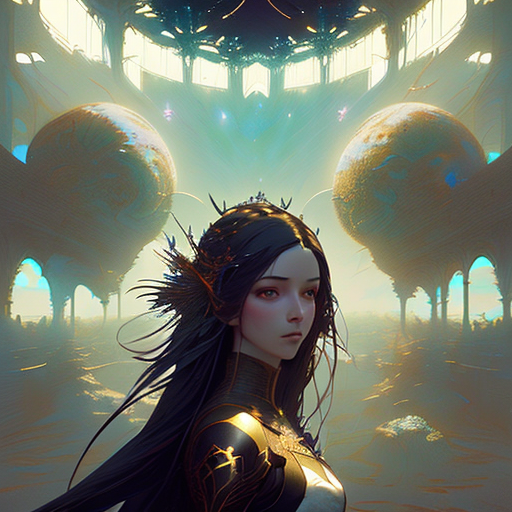

In [8]:
from diffusers.utils import make_image_grid
pipeline.to('mps')
#pipeline.enable_attention_slicing()
images = pipeline(**get_inputs(batch_size=1), max_embeddings_multiples=3).images
images[0]